In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
hdf=pd.read_csv('healthcare_dataset.csv')
hdf.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [3]:
hdf.shape

(55500, 15)

In [4]:
hdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [5]:
hdf.isna().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

In [6]:
hdf.columns = hdf.columns.str.strip()


In [7]:
hdf.duplicated().sum()

534

In [8]:
hdf[hdf.duplicated()]


,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
50023,Samuel joYCe,56,Male,O+,Arthritis,2022-11-03,Krista Hartman,Thomas-Ballard,UnitedHealthcare,15654.830587,157,Urgent,2022-11-22,Aspirin,Inconclusive
50040,KIMBErly vasqueZ,26,Male,A-,Obesity,2023-10-23,Jennifer Bennett,Cowan Inc,UnitedHealthcare,38142.109678,313,Urgent,2023-11-18,Penicillin,Abnormal
50055,SCoTT tHOrNton,55,Female,B-,Obesity,2021-04-08,Joshua Ingram,Keller LLC,Medicare,30894.904511,455,Urgent,2021-04-15,Aspirin,Abnormal
50070,wiLliam LEe,27,Female,O+,Arthritis,2020-01-31,Lauren Montgomery,Winters-Simon,Cigna,46229.434901,153,Elective,2020-02-13,Lipitor,Normal
50078,chRistOPheR NoRrIs,38,Male,AB-,Arthritis,2023-01-14,Denise Blair,Inc Morales,Medicare,9072.127142,452,Emergency,2023-02-12,Penicillin,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55461,connOR coMPTon,63,Male,A+,Asthma,2021-08-21,Jonathan Allen,"and Willis Mullins, Bowers",Medicare,1936.702824,375,Emergency,2021-09-16,Paracetamol,Normal
55462,alYSsA mIlLER,35,Female,A-,Diabetes,2022-06-30,Ryan Price,Shelton-Gallagher,UnitedHealthcare,2210.460898,289,Elective,2022-07-27,Penicillin,Normal
55464,ChRIs huGHeS,35,Female,AB-,Obesity,2024-02-28,Katelyn Perry,Lyons-Hansen,Blue Cross,11889.154513,128,Emergency,2024-03-14,Paracetamol,Abnormal
55484,keNNEtH alvarez,80,Male,O+,Cancer,2022-05-05,Andrew Conner,Sons Mayo and,Cigna,45653.802310,114,Elective,2022-05-17,Aspirin,Normal


In [9]:
duplicated_rows = hdf[hdf.duplicated(keep='last')]
duplicated_rows

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
64,Nancy glOVeR,58,Male,A-,Hypertension,2020-05-08,Jennifer Larson,"Khan, and Rodriguez Fischer",Medicare,19183.168885,378,Emergency,2020-06-01,Aspirin,Abnormal
107,DAVid higgInS,49,Female,B-,Arthritis,2021-03-05,Erin Henderson MD,"Evans and Hall Schneider,",Medicare,24948.477824,361,Emergency,2021-03-20,Penicillin,Abnormal
148,RoBErt hIGGInS,42,Male,AB-,Asthma,2021-05-06,Scott Davis,"and Ford Lee, Rodriguez",Medicare,13355.782085,451,Elective,2021-05-29,Ibuprofen,Inconclusive
154,kevIn HiCKs,66,Male,AB+,Arthritis,2021-06-23,Kelly Murphy,Robinson Inc,Medicare,1897.891727,196,Elective,2021-07-09,Ibuprofen,Abnormal
159,miCHAeL TayloR,29,Male,O-,Asthma,2020-02-27,Erica Mccormick,Donaldson-Frey,Medicare,41939.119937,453,Elective,2020-03-26,Ibuprofen,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49599,david hamMonD,71,Female,A-,Obesity,2019-08-03,Richard Romero,"Collins, Zimmerman Lewis and",Cigna,18614.657662,107,Urgent,2019-08-27,Penicillin,Normal
49602,eRIN PIneDA,35,Male,B+,Cancer,2019-08-08,Eddie Jennings,Klein-Warren,Cigna,48279.872600,127,Elective,2019-09-04,Aspirin,Inconclusive
49756,jASMInE SandeRs,49,Male,B-,Asthma,2022-06-06,Rachel Brown,"Smith Meyer Hernandez, and",Aetna,14893.590669,472,Elective,2022-06-14,Paracetamol,Abnormal
49956,MarY Ellis,52,Male,B-,Asthma,2019-08-31,Stacey Gonzalez,"and Cox, Lawrence Grimes",Medicare,19749.872448,482,Urgent,2019-09-05,Paracetamol,Abnormal


In [10]:
duplicated_names = hdf[hdf.duplicated(['Name', 'Age','Date of Admission'])]

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

display(duplicated_names)

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
50023,Samuel joYCe,56,Male,O+,Arthritis,2022-11-03,Krista Hartman,Thomas-Ballard,UnitedHealthcare,15654.830587,157,Urgent,2022-11-22,Aspirin,Inconclusive
50040,KIMBErly vasqueZ,26,Male,A-,Obesity,2023-10-23,Jennifer Bennett,Cowan Inc,UnitedHealthcare,38142.109678,313,Urgent,2023-11-18,Penicillin,Abnormal
50055,SCoTT tHOrNton,55,Female,B-,Obesity,2021-04-08,Joshua Ingram,Keller LLC,Medicare,30894.904511,455,Urgent,2021-04-15,Aspirin,Abnormal
50070,wiLliam LEe,27,Female,O+,Arthritis,2020-01-31,Lauren Montgomery,Winters-Simon,Cigna,46229.434901,153,Elective,2020-02-13,Lipitor,Normal
50078,chRistOPheR NoRrIs,38,Male,AB-,Arthritis,2023-01-14,Denise Blair,Inc Morales,Medicare,9072.127142,452,Emergency,2023-02-12,Penicillin,Normal
50081,TRAVis best,65,Female,B+,Asthma,2020-01-15,Kristin Anderson,Thomas-Johnson,Blue Cross,5903.933834,246,Urgent,2020-02-14,Aspirin,Abnormal
50086,MATTHEw foSTer,60,Female,AB-,Obesity,2020-02-12,Taylor Frank,Ltd Alvarado,Aetna,4735.300151,140,Urgent,2020-02-25,Penicillin,Normal
50090,MAnuEL THOrntON,51,Male,O-,Asthma,2023-07-25,Kathy King,"Morgan Hernandez, and Beck",UnitedHealthcare,45601.814762,378,Urgent,2023-08-08,Ibuprofen,Normal
50095,MadelINe BAKer,49,Male,A+,Cancer,2019-11-18,Melissa Alvarado,"Lane Riley and Fisher,",Cigna,3840.740363,144,Emergency,2019-12-07,Paracetamol,Inconclusive
50102,ReginAld WRight,50,Male,AB-,Asthma,2020-04-25,Michael Arias,"Clark, and Estes Thomas",Aetna,26886.655207,210,Urgent,2020-05-03,Paracetamol,Abnormal


In [11]:
duplicated_names.shape

(534, 15)

In [12]:
# Find rows where the 'name' column is same
samuel_joyce = hdf[hdf['Name'] == 'Samuel joYCe']

display(samuel_joyce)

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
6319,Samuel joYCe,56,Male,O+,Arthritis,2022-11-03,Krista Hartman,Thomas-Ballard,UnitedHealthcare,15654.830587,157,Urgent,2022-11-22,Aspirin,Inconclusive
50023,Samuel joYCe,56,Male,O+,Arthritis,2022-11-03,Krista Hartman,Thomas-Ballard,UnitedHealthcare,15654.830587,157,Urgent,2022-11-22,Aspirin,Inconclusive


In [13]:
#from careful consideration,there are duplicated data which needs to removed
#Initally i thought some patients were probably remadimitted but that is not the case

In [14]:
#lets drop duplicates
hdf.drop_duplicates(inplace=True)


In [15]:
# Convert the 'Name' column to lowercase
hdf['Name'] = hdf['Name'].str.lower()
hdf.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,bobby jackson,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,leslie terry,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,danny smith,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrew watts,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrienne bell,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [16]:
# Convert the 'Date' column to date type
hdf['Date of Admission'] = pd.to_datetime(hdf['Date of Admission'])
hdf['Discharge Date'] = pd.to_datetime(hdf['Discharge Date'])

In [17]:
hdf.dtypes

Name                          object
Age                            int64
Gender                        object
Blood Type                    object
Medical Condition             object
Date of Admission     datetime64[ns]
Doctor                        object
Hospital                      object
Insurance Provider            object
Billing Amount               float64
Room Number                    int64
Admission Type                object
Discharge Date        datetime64[ns]
Medication                    object
Test Results                  object
dtype: object

In [18]:
hdf.describe()

,Age,Date of Admission,Billing Amount,Room Number,Discharge Date
count,54966.000000,54966,54966.000000,54966.000000,54966
mean,51.535185,2021-11-01 17:35:29.505512448,25544.306284,301.124404,2021-11-17 05:34:28.202161408
min,13.000000,2019-05-08 00:00:00,-2008.492140,101.000000,2019-05-09 00:00:00
25%,35.000000,2020-07-28 00:00:00,13243.718641,202.000000,2020-08-13 00:00:00
50%,52.000000,2021-11-02 00:00:00,25542.749145,302.000000,2021-11-18 00:00:00
75%,68.000000,2023-02-03 00:00:00,37819.858159,401.000000,2023-02-19 00:00:00
max,89.000000,2024-05-07 00:00:00,52764.276736,500.000000,2024-06-06 00:00:00
std,19.605661,NaN,14208.409711,115.223143,NaN


In [19]:
description = hdf.describe(include="object").T
display(description)

,count,unique,top,freq
Name,54966,40235,michael williams,24
Gender,54966,2,Male,27496
Blood Type,54966,8,A-,6898
Medical Condition,54966,6,Arthritis,9218
Doctor,54966,40341,Michael Smith,27
Hospital,54966,39876,LLC Smith,44
Insurance Provider,54966,5,Cigna,11139
Admission Type,54966,3,Elective,18473
Medication,54966,5,Lipitor,11038
Test Results,54966,3,Abnormal,18437


In [20]:
hdf['Gender'].value_counts()

Gender
Male      27496
Female    27470
Name: count, dtype: int64

In [21]:
hdf['Blood Type'].value_counts()

Blood Type
A-     6898
A+     6896
B+     6885
AB+    6882
AB-    6874
B-     6872
O+     6855
O-     6804
Name: count, dtype: int64

In [22]:
hdf['Admission Type'].value_counts()

Admission Type
Elective     18473
Urgent       18391
Emergency    18102
Name: count, dtype: int64

In [23]:
hdf['Insurance Provider'].value_counts()

Insurance Provider
Cigna               11139
Medicare            11039
UnitedHealthcare    11014
Blue Cross          10952
Aetna               10822
Name: count, dtype: int64

In [24]:
hdf['Test Results'].value_counts()

Test Results
Abnormal        18437
Normal          18331
Inconclusive    18198
Name: count, dtype: int64

In [25]:
hdf['Doctor'].value_counts()

Doctor
Michael Smith                   27
John Smith                      22
Robert Smith                    21
James Smith                     20
Michael Johnson                 20
Robert Johnson                  19
David Smith                     19
Michael Williams                18
Christopher Smith               17
Matthew Smith                   17
John Johnson                    17
Michael Brown                   16
Christopher Brown               15
Jennifer Johnson                15
Daniel Smith                    15
David Johnson                   15
William Johnson                 15
Elizabeth Smith                 15
Anthony Smith                   14
Lisa Smith                      14
Michael Davis                   13
Jennifer Jones                  13
Jessica Johnson                 13
Eric Johnson                    13
James Brown                     12
John Martin                     12
Christopher Williams            12
John Jones                      12
Daniel Johnso

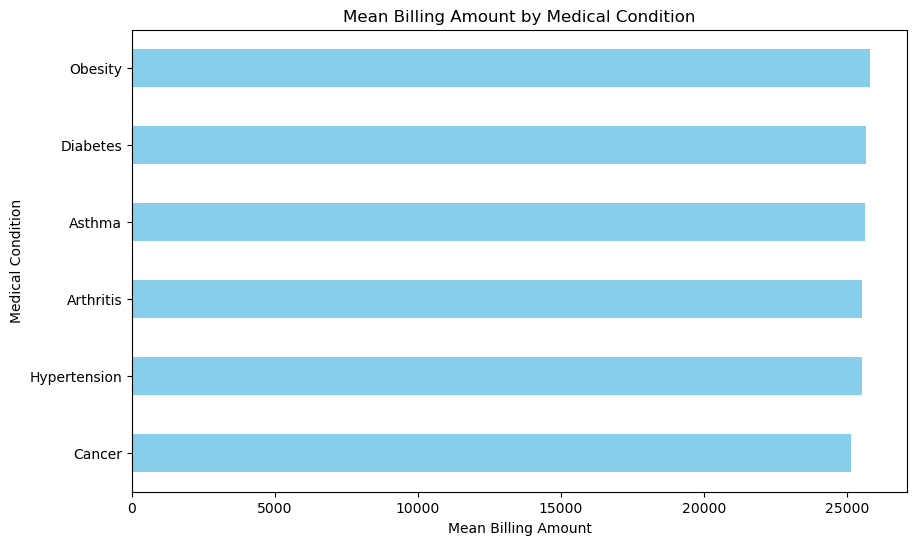

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by Medical Condition and calculate mean billing amount for each condition
avg_billing_by_condition = hdf.groupby('Medical Condition')['Billing Amount'].mean().sort_values()

# Plotting the mean billing amount for each medical condition
plt.figure(figsize=(10, 6))
avg_billing_by_condition.plot(kind='barh', color='skyblue')
plt.xlabel('Mean Billing Amount')
plt.ylabel('Medical Condition')
plt.title('Mean Billing Amount by Medical Condition')
plt.show()


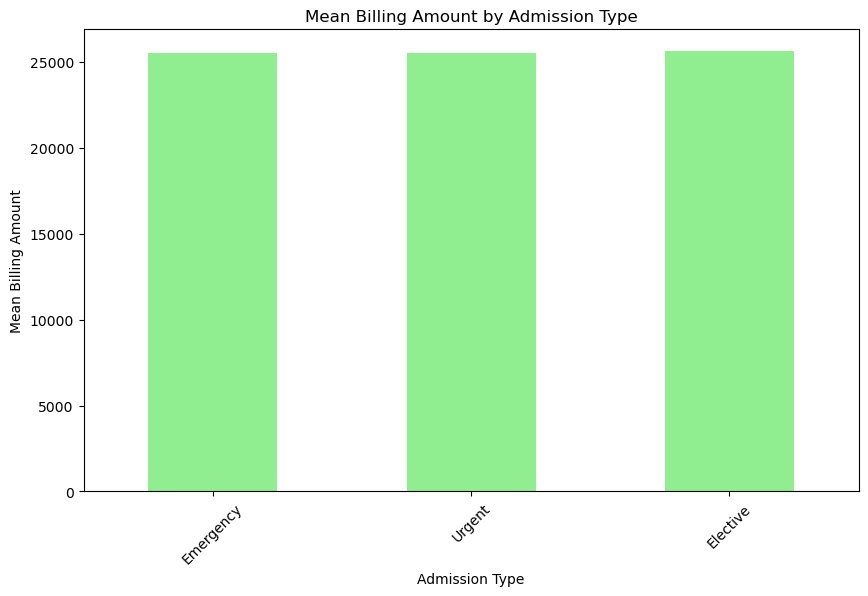

In [27]:
# Group by Admission Type and calculate mean billing amount for each type
avg_billing_by_admission = hdf.groupby('Admission Type')['Billing Amount'].mean().sort_values()

# Plotting the mean billing amount for each admission type
plt.figure(figsize=(10, 6))
avg_billing_by_admission.plot(kind='bar', color='lightgreen')
plt.xlabel('Admission Type')
plt.ylabel('Mean Billing Amount')
plt.title('Mean Billing Amount by Admission Type')
plt.xticks(rotation=45)
plt.show()


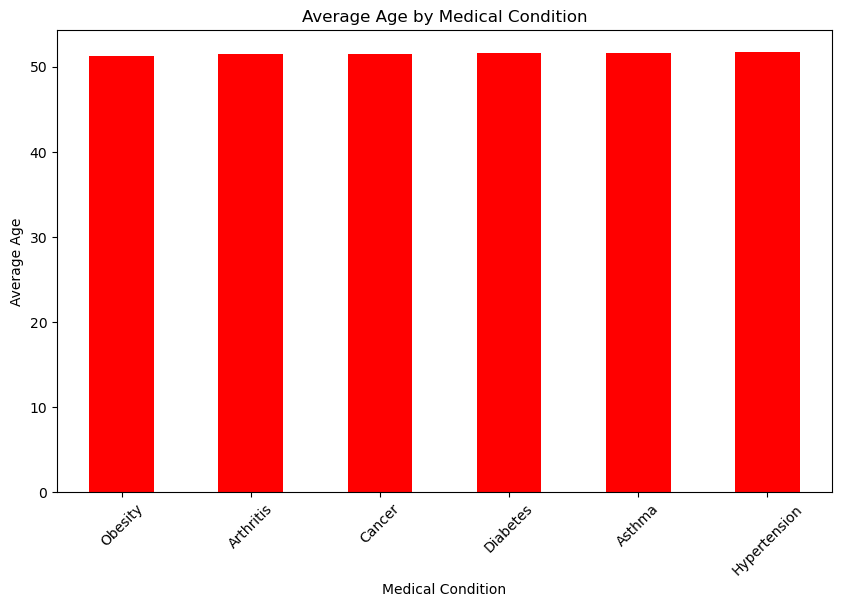

In [28]:
# Group by Medical condition and calculate mean age  for each type
avg_age_by_medical = hdf.groupby('Medical Condition')['Age'].mean().sort_values()

plt.figure(figsize=(10, 6))
avg_age_by_medical.plot(kind='bar', color='red')
plt.xlabel('Medical Condition')
plt.ylabel('Average Age')
plt.title('Average Age by Medical Condition')
plt.xticks(rotation=45)
plt.show()

Mean Hospital Stay Duration: 15.499290470472657 days
Median Hospital Stay Duration: 15.0 days
Standard Deviation of Hospital Stay Duration: 8.66147080729332 days


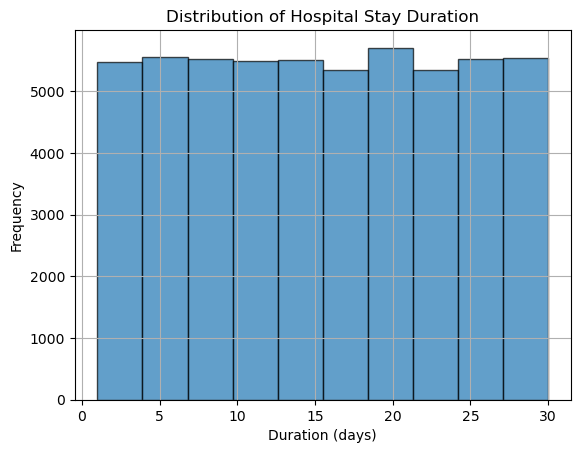

In [29]:
# Calculate hospital stay duration
hdf['Hospital Stay Duration'] = (hdf['Discharge Date'] - hdf['Date of Admission']).dt.days

# Summary statistics
mean_duration = hdf['Hospital Stay Duration'].mean()
median_duration = hdf['Hospital Stay Duration'].median()
std_duration = hdf['Hospital Stay Duration'].std()

print("Mean Hospital Stay Duration:", mean_duration, "days")
print("Median Hospital Stay Duration:", median_duration, "days")
print("Standard Deviation of Hospital Stay Duration:", std_duration, "days")

# Visualize the data
hdf['Hospital Stay Duration'].plot.hist(bins=10, edgecolor='k', alpha=0.7)
plt.title('Distribution of Hospital Stay Duration')
plt.xlabel('Duration (days)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [30]:
Health_df=hdf.to_csv('hdf.csv', index=False)
